# acquire & summarize

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

from acquire import get_connection, get_zillow_data



1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

    - Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.
    - Only include properties with a transaction in 2017, and include only the last transaction for each properity (so no duplicate property ID's), along with zestimate error and date of transaction.
    - Only include properties that include a latitude and longitude value.

In [6]:
df = get_zillow_data()

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (66,76) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe().T

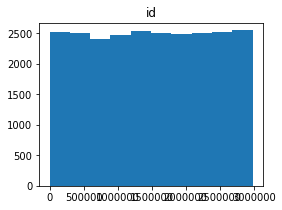

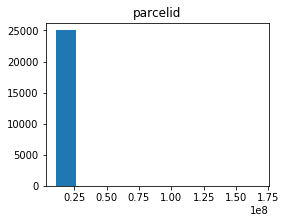

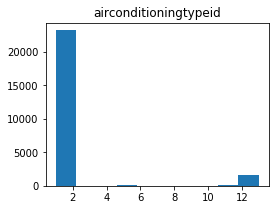

/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


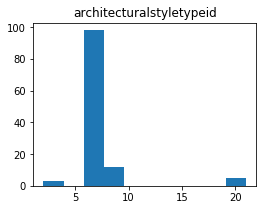

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6743: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6744: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

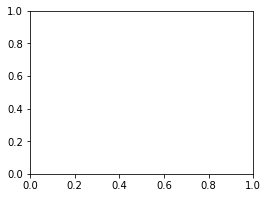

In [7]:
for col in df.columns:
    if df[col].dtype != object:
        plt.figure(figsize=(4,3))
        plt.hist(df[col])
        plt.title(col)
        plt.show()

In [8]:
for col in df.columns:
    print("\n")
    print(df[col].value_counts())
    print("\n")



2119208    2
471716     2
694050     2
159239     2
1464384    2
          ..
1117531    1
2712181    1
998749     1
894457     1
2046585    1
Name: id, Length: 24953, dtype: int64




10777937    2
11289917    2
10956664    2
13075560    2
12892594    2
           ..
11186591    1
11199798    1
12969394    1
12964952    1
11173888    1
Name: parcelid, Length: 24953, dtype: int64




1.0     23185
13.0     1575
5.0       167
11.0       53
9.0        26
Name: airconditioningtypeid, dtype: int64




7.0     98
8.0     12
21.0     5
2.0      2
3.0      1
Name: architecturalstyletypeid, dtype: int64




Series([], Name: basementsqft, dtype: int64)




3.0     9925
2.0     9636
1.0     1794
4.0     1597
5.0      681
2.5      651
6.0      278
1.5      162
3.5       78
7.0       69
8.0       61
4.5       21
0.0       17
9.0       14
5.5        6
10.0       6
6.5        4
11.0       3
13.0       1
18.0       1
7.5        1
Name: bathroomcnt, dtype: int64




3.0     8964
2.0     6331
4.0    

Name: airconditioningtypeid.1, dtype: int64




Central          23185
Yes               1575
None               167
Wall Unit           53
Refrigeration       26
Name: airconditioningdesc, dtype: int64




7.0     98
8.0     12
21.0     5
2.0      2
3.0      1
Name: architecturalstyletypeid.1, dtype: int64




Contemporary     98
Conventional     12
Ranch/Rambler     5
Bungalow          2
Cape Cod          1
Name: architecturalstyledesc, dtype: int64




4.0    501
5.0     27
1.0      5
3.0      3
Name: buildingclasstypeid.1, dtype: int64




Buildings having wood or wood and steel frames                                                                                                                                                                                             501
Specialized buildings that do not fit in any of the above categories                                                                                                                                               

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [3]:
df.architecturalstyletypeid.isna().sum()

architecturalstyletypeid    24888
architecturalstyletypeid    24888
dtype: int64

4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

# Prepare

1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

    - The input:
        - A dataframe
        - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
        - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).
    - The output:
        - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.
    - hint:
        - Look up the dropna documentation.
        - You will want to compute a threshold from your input values (prop_required) and total number of rows or columns.
        - Make use of inplace, i.e. inplace=True/False.

3. Decide how to handle the remaining missing values:

    - Fill with constant value.
    - Impute with mean, median, mode.
    - Drop row/column